In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [76]:
df = pd.read_csv("Group 2.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6167,3154-CFSZG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.2,No
1,1527,0640-YJTPY,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1493.75,No
2,2397,3722-WPXTK,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes
3,2241,2908-WGAXL,Female,0,Yes,Yes,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1468.9,No
4,5194,1902-XBTFB,Male,0,No,Yes,22,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.5,Yes


In [77]:
df['TotalCharges'].describe()

count     5001
unique    4710
top       20.2
freq         9
Name: TotalCharges, dtype: object

In [78]:
# Create Customer Value Segments based on quantiles of TotalCharges
# Convert 'TotalCharges' to numeric, coercing errors to NaN (if there are invalid strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Optionally, handle the NaN values (e.g., remove rows with NaN in 'TotalCharges')
df = df.dropna(subset=['TotalCharges'])

# Now you can use pd.qcut to create the Customer Value Segment
df['Customer Value Segment'] = pd.qcut(df['TotalCharges'], q=3, labels=['Low', 'Medium', 'High'])

# Display the first few rows to verify
print(df[['TotalCharges', 'Customer Value Segment']].head())

   TotalCharges Customer Value Segment
0       4137.20                   High
1       1493.75                 Medium
2         88.35                    Low
3       1468.90                 Medium
4       2001.50                 Medium


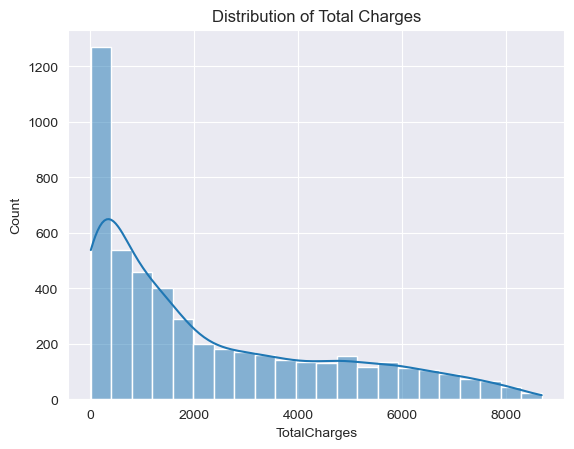

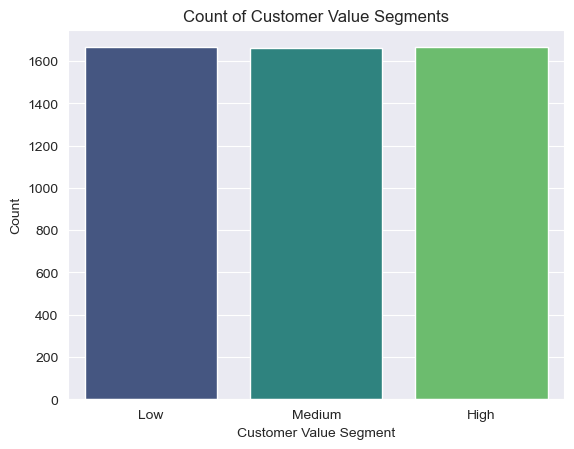

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of TotalCharges and Customer Value Segments
sns.histplot(df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')
plt.show()

sns.countplot(x='Customer Value Segment', data=df, hue='Customer Value Segment', palette='viridis', legend=False)

# Add title and labels
plt.title('Count of Customer Value Segments')
plt.xlabel('Customer Value Segment')
plt.ylabel('Count')

plt.show()



In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
df['Churn'] = label_encoder.fit_transform(df['Churn'])

df.dropna(axis =0, inplace=True)
df.isnull().sum()



Unnamed: 0                0
customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    0
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
Customer Value Segment    0
dtype: int64

In [81]:
df = df.drop(["customerID"], axis = 1)
df.head()


,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Customer Value Segment
0,6167,Male,0,Yes,Yes,47,Yes,No,Fiber optic,Yes,...,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.20,0,High
1,1527,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1493.75,0,Medium
2,2397,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,1,Low
3,2241,Female,0,Yes,Yes,56,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1468.90,0,Medium
4,5194,Male,0,No,Yes,22,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.50,1,Medium


In [82]:

dummies=(["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
          "OnlineSecurity","OnlineBackup","DeviceProtection","StreamingTV","StreamingMovies"
        ,"PaperlessBilling","PaymentMethod"])

# One Hot Encoding 
df = pd.get_dummies(df, columns=dummies, drop_first= True )
df.head()

X = df.drop(['Customer Value Segment', 'TotalCharges'], axis=1)  # Features
y = df['Customer Value Segment']  # Target variable (Low, Medium, High)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

lda=LinearDiscriminantAnalysis()
lda.fit(X_train,y_train )
y_predict=lda.predict(X_test)
print(classification_report(y_test,y_predict))


ValueError: could not convert string to float: 'No'

In [ ]:
# Group customers by the value segment and calculate the mean of numeric columns
profile = df.groupby('Customer Value Segment').mean()
print(profile)

# Visualize the differences in the average MonthlyCharges between segments
sns.boxplot(x='Customer Value Segment', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Customer Value Segment')
plt.show()

In [ ]:
df['CLV'] = df['MonthlyCharges'] * df['tenure']
sns.histplot(df['CLV'], kde=True)
plt.title('Distribution of Customer Lifetime Value')
plt.show()

In [ ]:
print(df.columns)


In [ ]:
df.head()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame creation (Replace with your actual data)
# df = pd.read_csv('your_data.csv')

# Assuming df has columns 'TotalCharges' and 'CustomerChurn'
# Define customer profiles based on 'TotalCharges'
bins = [0, 1000, 5000, float('inf')]
labels = ['Low', 'Medium', 'High']
#df['Profile'] = pd.cut(df['Customer Value Segment'], bins=bins, labels=labels, right=False)

# Group by profile and churn status to calculate the average total charges

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Customer Value Segment', y='TotalCharges', hue='Churn', palette='viridis')

plt.title('Average Total Charges by Customer Profile and Churn Status')
plt.xlabel('Customer Profile')
plt.ylabel('Average Total Charges')
plt.legend(title='Customer Churn')
plt.show()

In [ ]:
a= np.array(y_test)
predicted = np.array(lda.predict(X_test))
df_com=pd.DataFrame({"Original":a, "Predicted": predicted}, index= range(len(a)))
df_com.head(500)


Customer Value Segment


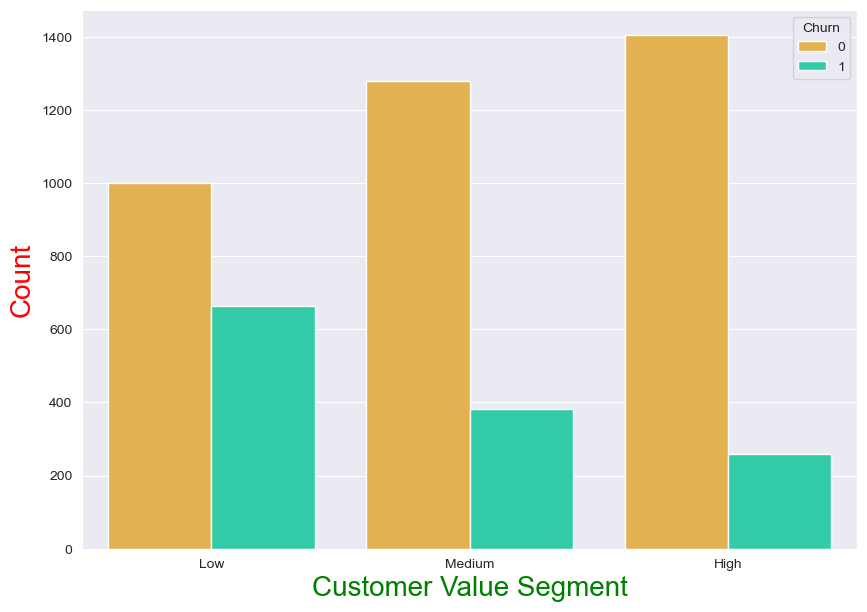

In [87]:
plt.figure(figsize= (10, 7))
sns.countplot(x="Customer Value Segment",hue="Churn",palette="turbo_r",data=df)

plt.xticks(fontsize = 10)
plt.xlabel("Customer Value Segment", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

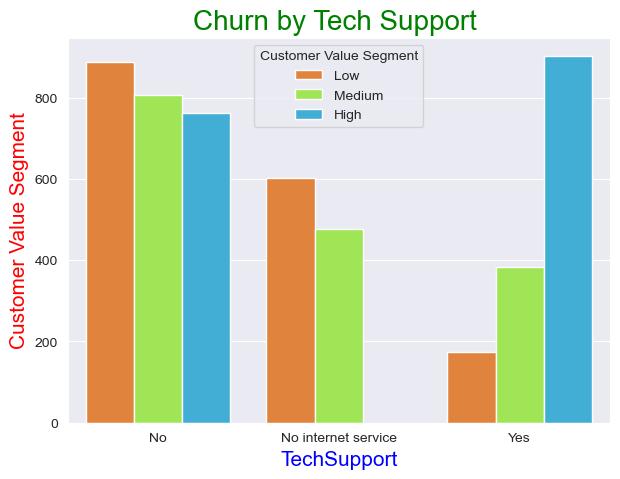

In [84]:

plt.figure(figsize=(7,5))
sns.countplot(x= "TechSupport", data= df ,palette="turbo_r", hue="Customer Value Segment")

plt.xlabel("TechSupport", fontsize= 15, c = "b")
plt.ylabel("Customer Value Segment", fontsize= 15, c = "r")
plt.title("Churn by Tech Support ", fontsize = 20, c= "g")
plt.show()

1. Customer in Low Segment have less customer support and hence increasing there customer support would help to prevent churn and move them to next well 


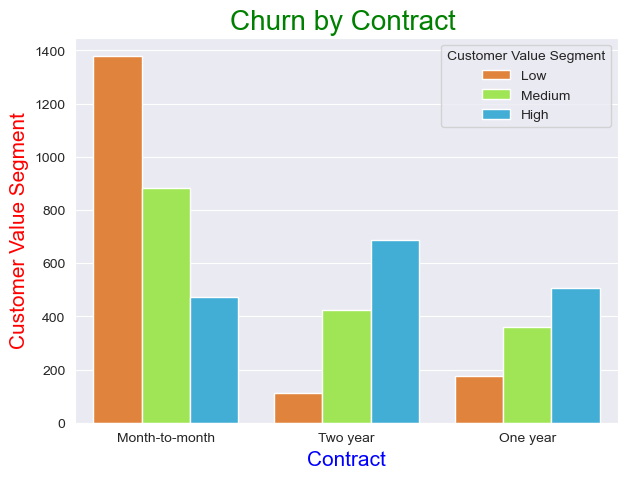

In [86]:
plt.figure(figsize=(7,5))
sns.countplot(x= "Contract", data= df ,palette="turbo_r", hue="Customer Value Segment")

plt.xlabel("Contract", fontsize= 15, c = "b")
plt.ylabel("Customer Value Segment", fontsize= 15, c = "r")
plt.title("Churn by Contract ", fontsize = 20, c= "g")
plt.show()

Increasing the contract for low segment from m2m to yearly would also ensure churn is reduced 
and customer would move to better segment 


2. 


